<a href="https://colab.research.google.com/github/GreggHeller1/Adult-Spine-Models/blob/main/scripts/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#settings
%load_ext autoreload
%autoreload 2
try:
  import google.colab
  in_colab = True
except:
  in_colab = False
print(in_colab)

False


In [2]:
#installs (for colab only, run this once)
if in_colab:
    ! git clone https://github.com/GreggHeller1/Adult-Spine-Models.git

In [3]:
#local imports
#cwd if in colab for imports to work
if in_colab:
    %cd /content/Adult-Spine-Models
    
from src import data_io as io
from src import plotting
from src import computation as comp

In [5]:
#imports
import xarray as xr
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os


In [9]:
#define paths
#cwd if in colab for file loading to work
if in_colab:
    %cd /content/Adult-Spine-Models/scripts
    
test_path = os.path.join('demo_data', 'test.txt')
print(test_path)
print(os.getcwd())
print(os.path.exists(test_path))


soma_path = "/Users/Gregg/code/Adult-Spine-Models/scripts/demo_data/ASC26_cell_3_soma.mat"
spines_path = "/Users/Gregg/code/Adult-Spine-Models/scripts/demo_data/ASC26_cell_3_spines.mat"
print(os.path.exists(soma_path))
print(os.path.exists(spines_path))

demo_data/test.txt
/Users/Gregg/code/adult-spine-models/scripts
True
True
True


In [49]:
#data inputs
#io.readfile(test_path)
soma = io.loadmat(soma_path)
spines = io.loadmat(spines_path)

In [50]:
#data manipulation

print(soma[3])
print(spines['dend_cell'])

#print(np.shape(soma['soma_cell']))
#print(np.shape(spines['dend_cell']))



#print(soma['soma_cell'][0,3]._fieldnames)


<HDF5 dataset "dend_cell": shape (4, 11), type "|O">


In [64]:
#print(spines.keys())
#print(np.shape(soma[3]))
#print(soma[3].keys())


soma_field_2 = io._todict(soma[2])

ref = spines['dend_cell'][2,0]
spine_field_2 = spines[ref]#['DSI']

print(np.array(field_2))
#print(field_2['vis_stim_times'])

#spines_f2 = 


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [83]:
soma_traces = np.array(soma_field_2['trial_traces'])
spine_traces = np.array(spine_field_2['trial_traces'][:,:,0,:,0].swapaxes(0,-1))

print(soma_traces.shape)
print(spine_traces.shape)


trial_amps = np.array(field_2['trial_amp'])
#print(trial_amps.shape)

(16, 10, 91)
(16, 10, 91)


In [84]:
#plots
def response_mat(traces):

def response_plot(traces):
    plt.imshow


IndentationError: expected an indented block after function definition on line 2 (2914739899.py, line 4)

(16, 10, 91)


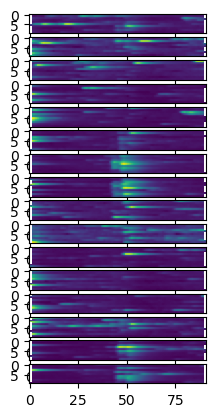

In [152]:
#data output
traces= soma_traces

print(traces.shape)
fig, axs = plt.subplots(traces.shape[0])
for i in range(traces.shape[0]):
    axs[i].imshow(traces[i,:,:])

In [97]:

def flatten_for_image(d3_array):
    return d3_array.reshape(d3_array.shape[0]*d3_array.shape[1], d3_array.shape[2])
    

def reorder_rows(mat, sort_mat):
    #assert(mat.shape==sort_mat.shape)
    column_ordering = np.argsort(sort_mat)
    row_sorted_mat = np.empty(mat.shape)
    for row in range(column_ordering.shape[0]):
        row_sorted_mat[row,:] = mat[row,:][column_ordering[row,::-1]]
    return row_sorted_mat

def reorder_columns(mat, sort_mat):
    row_means = np.mean(sort_mat, axis=-1)
    row_ordering = np.argsort(row_means)[::-1]
    row_sorted_mat = mat[row_ordering]
    return row_sorted_mat

def reorder_mat(mat, sort_mat):
    column_sorted_mat = reorder_rows(mat, sort_mat)
    return reorder_columns(column_sorted_mat, sort_mat)

def reorder_3d_array(d3_array, sort_mat):
    sorted_array = np.empty(d3_array.shape)
    for i in range(d3_array.shape[2]):
        sorted_array[:,:,i] = reorder_mat(d3_array[:,:,i], sort_mat)
    return sorted_array




In [190]:

# what do we want? we want a function that we can pass in and produce all those plots 
#we aren't sure whether we should be sorting before or after... 


#parameters
start_s = -1 #number of seconds before the stim onset to begin the window of interest
end_s = 4    #number of seconds after the stim onset to end the window of interest
seconds_per_bin = 1  #defines the size of the bins that we want to predict

assert((end_s-start_s)%seconds_per_bin==0, 'The time range must be evenly divisible by the bin size')
frame_rate = 10  #frames per second
stim_start = 40 #the sample on which the stim comes on


selected_timesteps = traces[:,:,stim_start+start_s*frame_rate:stim_start+end_s*frame_rate]

timepoints_per_period = seconds_per_bin*frame_rate  #int(pre_post.shape[1]/num_tranges) <- might be safer to do it his way... will run into problems when not an integer multiple
num_tranges = int(selected_timesteps.shape[2]/timepoints_per_period)
selected_period_means = np.empty(selected_timesteps.shape)

print(selected_timesteps.shape)

scale_width = 0
#Reduce each time period trace to the mean in each period
for i in range(num_tranges):
    mean_activity_in_trange = np.mean(selected_timesteps[:,:,i*timepoints_per_period:(i+1)*timepoints_per_period], axis=2)
    print(mean_activity_in_trange.shape)
    for j in range(timepoints_per_period):
        selected_period_means[:,:,j+i*timepoints_per_period] = mean_activity_in_trange #tried doing this with tile and ran into trouble/
        
         

## we want to sort this one based on the difference between the pre and post stime periods
first_entry_after_stim = selected_period_means[:,:, start_s*-1*frame_rate]
sort_mat = selected_period_means[:,:, start_s*-1*frame_rate] - selected_period_means[:,:,0]

sorted_period_means = reorder_3d_array(selected_period_means, sort_mat)

#Use this to determine the soma threshold
#plt.hist(first_entry_after_stim)
#spine_threshold = 2
soma_threshold = .5
#then boolean over or under the soma threshold
bool_soma_activity = sorted_period_means>soma_threshold







(16, 10, 50)
(16, 10)
(16, 10)
(16, 10)
(16, 10)
(16, 10)


<>:11: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:11: SyntaxWarning: assertion is always true, perhaps remove parentheses?
/var/folders/g1/6vwjn_j57xl946xjwjw3yyn80000gn/T/ipykernel_37194/4222846806.py:11: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert((end_s-start_s)%seconds_per_bin==0, 'The time range must be evenly divisible by the bin size')


(16, 10, 91)


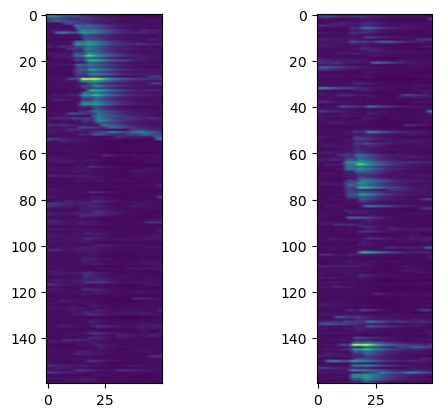

In [191]:
#traces = selected_timesteps
print(traces.shape)
def sort_by_peak_time(traces):
    
    #get the times of the peaks
    filtered_traces = traces.copy()
    filtered_traces[traces<3] = 0
    filtered_traces[:,:,-1] = .001
    peak_times = np.argmax(filtered_traces, axis=-1)
    
    #get the order to sort them
    sort_order = np.argsort(peak_times, axis=None)
    sort_mat = np.array(np.unravel_index(sort_order, peak_times.shape))
    
    
    return sort_mat

def sort_by_max_amp(traces):
    
    #get the times of the peaks
    trace_means = np.max(traces.copy(), axis=-1)
    #filtered_traces[traces<3] = 0
    #filtered_traces[:,:,-1] = .001
    # = np.argmax(filtered_traces, axis=-1)
    
    #get the order to sort them
    sort_order = np.argsort(trace_means, axis=None)    
    sort_mat = np.array(np.unravel_index(sort_order, trace_means.shape))
    sort_mat = sort_mat[:,::-1] #We want sorted high to low, not low to high

    return sort_mat


def sort_by_mean_amp(traces):
    
    #get the times of the peaks
    trace_means = np.mean(traces.copy(), axis=-1)
    #filtered_traces[traces<3] = 0
    #filtered_traces[:,:,-1] = .001
    # = np.argmax(filtered_traces, axis=-1)
    
    #get the order to sort them
    sort_order = np.argsort(trace_means, axis=None)    
    sort_mat = np.array(np.unravel_index(sort_order, trace_means.shape))
    sort_mat = sort_mat[:,::-1] #We want sorted high to low, not low to high

    return sort_mat



def sort_for_image(traces, sort_mat):
    sotred_traces = []
    for i, j in zip(sort_mat[0], sort_mat[1]):
        #print(i,j)
        sotred_traces.append(traces[i,j,:])

    return sotred_traces #Should be shape #traces x #timepoints


sort_mat = sort_by_peak_time(selected_timesteps)

sotred_traces = sort_for_image(selected_timesteps, sort_mat)

fig, axs = plt.subplots(1,2)
axs[0].imshow(sotred_traces)
axs[1].imshow(flatten_for_image(selected_timesteps))

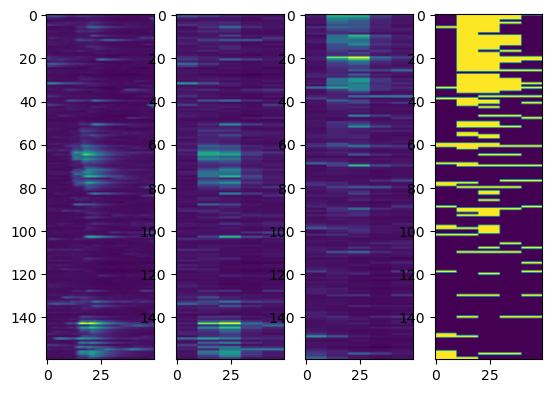

In [192]:
fig, axs = plt.subplots(1,4)


#PLot the oritinal traces
axs[0].imshow(flatten_for_image(selected_timesteps))

#plot the means in each time bin (stretched to appear the same as the full trace)
axs[1].imshow(flatten_for_image(selected_period_means))

#plot the sorted means
axs[2].imshow(flatten_for_image(sorted_period_means))

#and plot the boolean values (inherited sorting from the sorted means)
axs[3].imshow(flatten_for_image(bool_soma_activity))



In [193]:

test = np.array([3,2,1,0])


sort = np.array([[4,3,2,1], [8,7,6,5]]).T
print(sort)
print(sort[test])

#print(np.tile(test,(2,1)))


[[4 8]
 [3 7]
 [2 6]
 [1 5]]
[[1 5]
 [2 6]
 [3 7]
 [4 8]]
